# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=29fa6340e0342d36681b72bbc439d211a215674c098df38c87d2722d917007c0
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [3]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 10.77s ==============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [2]:
batch_size = 16  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [4]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=False
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.20it/s]


Epoch: 1 	Training Loss: 2.664284 	Validation Loss: 1.719901
New minimum validation loss: 1.719901. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  3.97it/s]


Epoch: 2 	Training Loss: 1.543866 	Validation Loss: 1.361633
New minimum validation loss: 1.361633. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.00it/s]


Epoch: 3 	Training Loss: 1.239807 	Validation Loss: 1.240694
New minimum validation loss: 1.240694. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.06it/s]


Epoch: 4 	Training Loss: 1.063273 	Validation Loss: 1.171117
New minimum validation loss: 1.171117. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.22it/s]


Epoch: 5 	Training Loss: 0.947080 	Validation Loss: 1.134257
New minimum validation loss: 1.134257. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.16it/s]

Epoch: 6 	Training Loss: 0.860331 	Validation Loss: 1.125322



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.19it/s]

Epoch: 7 	Training Loss: 0.806242 	Validation Loss: 1.141681



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.21it/s]


Epoch: 8 	Training Loss: 0.727583 	Validation Loss: 1.077057
New minimum validation loss: 1.077057. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.08it/s]

Epoch: 9 	Training Loss: 0.713236 	Validation Loss: 1.090601



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.00it/s]

Epoch: 10 	Training Loss: 0.648130 	Validation Loss: 1.111348



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.21it/s]

Epoch: 11 	Training Loss: 0.621838 	Validation Loss: 1.066667



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.22it/s]

Epoch: 12 	Training Loss: 0.590835 	Validation Loss: 1.113369



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.04it/s]

Epoch: 13 	Training Loss: 0.547080 	Validation Loss: 1.134861



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.20it/s]

Epoch: 14 	Training Loss: 0.531096 	Validation Loss: 1.122785



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.03it/s]

Epoch: 15 	Training Loss: 0.521636 	Validation Loss: 1.137651



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.02it/s]

Epoch: 16 	Training Loss: 0.437642 	Validation Loss: 1.067858



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  3.99it/s]

Epoch: 17 	Training Loss: 0.418180 	Validation Loss: 1.073667



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.05it/s]

Epoch: 18 	Training Loss: 0.409053 	Validation Loss: 1.073267



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.06it/s]

Epoch: 19 	Training Loss: 0.389752 	Validation Loss: 1.084221



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.19it/s]


Epoch: 20 	Training Loss: 0.395992 	Validation Loss: 1.048934
New minimum validation loss: 1.048934. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.20it/s]

Epoch: 21 	Training Loss: 0.402076 	Validation Loss: 1.055603



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.11it/s]


Epoch: 22 	Training Loss: 0.406704 	Validation Loss: 1.074655


Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.21it/s]

Epoch: 23 	Training Loss: 0.401113 	Validation Loss: 1.078069



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.21it/s]

Epoch: 24 	Training Loss: 0.381667 	Validation Loss: 1.074355



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.19it/s]

Epoch: 25 	Training Loss: 0.391504 	Validation Loss: 1.062863



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.10it/s]

Epoch: 26 	Training Loss: 0.385829 	Validation Loss: 1.071399



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.09it/s]

Epoch: 27 	Training Loss: 0.386084 	Validation Loss: 1.054077



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.19it/s]

Epoch: 28 	Training Loss: 0.387247 	Validation Loss: 1.054290



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.22it/s]

Epoch: 29 	Training Loss: 0.387488 	Validation Loss: 1.056078



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.19it/s]

Epoch: 30 	Training Loss: 0.396836 	Validation Loss: 1.058674



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.13it/s]

Epoch: 31 	Training Loss: 0.397293 	Validation Loss: 1.060665



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.20it/s]

Epoch: 32 	Training Loss: 0.396152 	Validation Loss: 1.075696



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.22it/s]


Epoch: 33 	Training Loss: 0.395401 	Validation Loss: 1.075809


Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.21it/s]

Epoch: 34 	Training Loss: 0.389238 	Validation Loss: 1.071893



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.13it/s]

Epoch: 35 	Training Loss: 0.390949 	Validation Loss: 1.061674



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.13it/s]

Epoch: 36 	Training Loss: 0.387220 	Validation Loss: 1.064815



Validating: 100%|███████████████████████████████| 63/63 [00:14<00:00,  4.21it/s]

Epoch: 37 	Training Loss: 0.389358 	Validation Loss: 1.059100



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.20it/s]

Epoch: 38 	Training Loss: 0.399918 	Validation Loss: 1.056976



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.17it/s]


Epoch: 39 	Training Loss: 0.389825 	Validation Loss: 1.062374


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.02it/s]

Epoch: 40 	Training Loss: 0.392216 	Validation Loss: 1.073581



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  3.96it/s]

Epoch: 41 	Training Loss: 0.401259 	Validation Loss: 1.061853



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.03it/s]

Epoch: 42 	Training Loss: 0.400040 	Validation Loss: 1.077646



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.05it/s]

Epoch: 43 	Training Loss: 0.386115 	Validation Loss: 1.060659



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.08it/s]

Epoch: 44 	Training Loss: 0.395628 	Validation Loss: 1.078407



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.06it/s]

Epoch: 45 	Training Loss: 0.396923 	Validation Loss: 1.065443



Validating: 100%|███████████████████████████████| 63/63 [00:16<00:00,  3.88it/s]

Epoch: 46 	Training Loss: 0.387809 	Validation Loss: 1.070043



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.00it/s]


Epoch: 47 	Training Loss: 0.381427 	Validation Loss: 1.083801


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.04it/s]


Epoch: 48 	Training Loss: 0.401873 	Validation Loss: 1.064413


Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.07it/s]

Epoch: 49 	Training Loss: 0.386704 	Validation Loss: 1.071634



Validating: 100%|███████████████████████████████| 63/63 [00:15<00:00,  4.08it/s]

Epoch: 50 	Training Loss: 0.393380 	Validation Loss: 1.060755


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ 



Steps to Final CNN Architecture
Choosing the Base Model:

Step: Selected resnet18 as the base model for transfer learning.
Reasoning: ResNet-18 is a well-known architecture that has shown excellent performance on various image classification tasks. It is relatively lightweight compared to deeper networks like ResNet-50 or ResNet-101, making it faster to train and less prone to overfitting on smaller datasets.
Loading Pretrained Weights:

Step: Loaded the pretrained weights for resnet18.
Reasoning: Using a pretrained model allows leveraging the features learned from a large dataset (like ImageNet). This helps in achieving better performance even with a smaller dataset, as the model has already learned useful features.
Freezing the Base Model Parameters:

Step: Froze all the parameters of the pretrained model.
Reasoning: Freezing the parameters ensures that the pretrained features are not altered during training. This is crucial because the dataset might be too small to train the entire network from scratch without overfitting.
Modifying the Final Layer:

Step: Replaced the final fully connected layer with a new one that has n_classes outputs.
Reasoning: The original final layer of ResNet-18 is designed for ImageNet's 1000 classes. For our specific problem, we need to classify the images into n_classes (in this case, 50). Hence, the final layer is modified to match the number of classes in our dataset.
Suitability of the Architecture
Pretrained Features:

Reasoning: The pretrained ResNet-18 model has already learned to extract a wide variety of features from images, such as edges, textures, and shapes. These features are likely to be useful for the landmark classification task, allowing the model to generalize better.
Transfer Learning Efficiency:

Reasoning: By freezing the base layers and only training the final layer, the model can be trained more efficiently. This reduces the risk of overfitting and requires less computational power and time compared to training a model from scratch.
Model Complexity:

Reasoning: ResNet-18 strikes a good balance between complexity and performance. It is deep enough to capture intricate patterns in the data but not so deep that it becomes computationally prohibitive or prone to overfitting on smaller datasets.
Flexibility:

Reasoning: The architecture is flexible and can be easily modified if needed. For example, if the dataset size increases or if more computational resources become available, a deeper ResNet variant (like ResNet-50) could be used with minimal changes to the code.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!



---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [5]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|████████████████████████████████| 313/313 [01:13<00:00,  4.27it/s]

Test Loss: 0.405247


Test Accuracy: 90% (4519/4996)


0.40524726058728394

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [6]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


 25%|█████████▎                           | 1250/4996 [30:03<1:30:04,  1.44s/it]


Accuracy: 0.5296


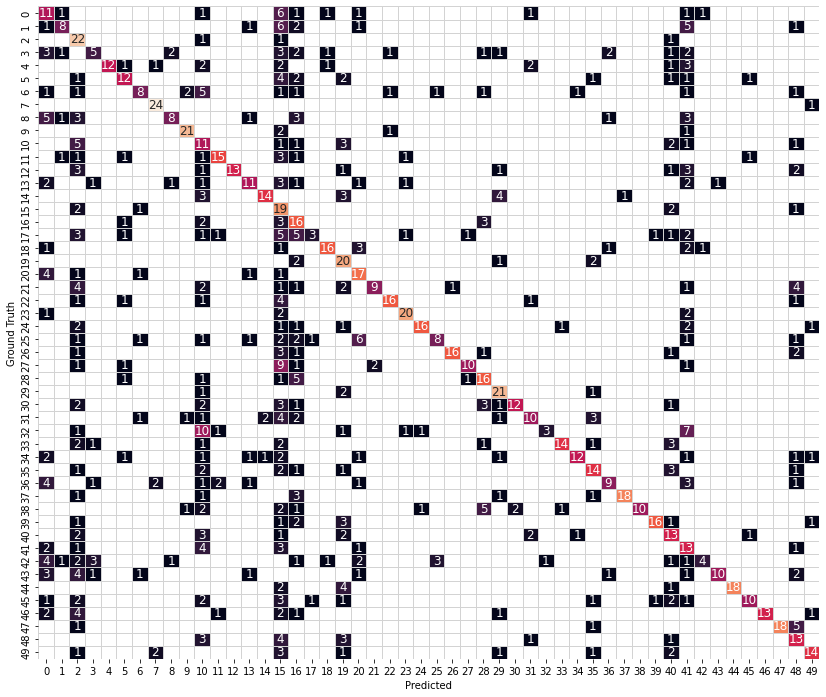

In [7]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)